In [1]:
import sys
sys.path.insert(0, '../')
import src

In [2]:
from src.plot import zplot

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scs

%matplotlib inline
plt.style.use('ggplot')

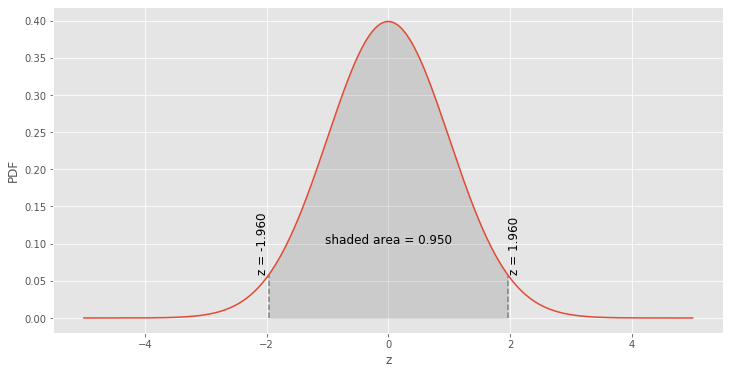

In [3]:
zplot()

## Variables

* N_A: sample size of control group
* N_B: sample size of test group
* X_A: number of successes in the control group
* X_B: number of successes in the test group

## Equations

* pooled_SE


In [4]:
def get_pooled_prob(N_A, N_B, X_A, X_B):
    return (X_A + X_B) / (N_A + N_B)

In [5]:
def get_pooled_SE(N_A, N_B, X_A, X_B):
    pooled_prob = get_pooled_prob(N_A, N_B, X_A, X_B)
    pooled_SE = np.sqrt(pooled_prob * (1 - pooled_prob) * (1 / N_A + 1 / N_B))
    return pooled_SE

In [6]:
# A is control; B is test
N_A = 1000
N_B = 1000
X_A = 110
X_B = 140

In [7]:
d = (X_B / N_B) - (X_A / N_A)

In [8]:
stderr = get_pooled_SE(N_A, N_B, X_A, X_B)
stderr

0.01479019945774904

In [9]:
def plot_CI(ax, mu, s, sig_level=0.05):
    z = scs.norm().ppf(1 - sig_level/2)
    left = mu - z * s
    right = mu + z * s
    ax.axvline(left, c='grey', linestyle='--', alpha=0.5)
    ax.axvline(right, c='grey', linestyle='--', alpha=0.5)

In [10]:
def plot_control(ax, x, stderr):
    y = scs.norm(0, stderr).pdf(x)
    ax.plot(x, y)
    plot_CI(ax, mu=0, s=stderr, sig_level=0.05)

In [11]:
def plot_test(ax, x, stderr, d):
    test_norm = scs.norm()
    y = scs.norm(d, stderr).pdf(x)
    ax.plot(x, y)
    plot_CI(ax, d, stderr, sig_level=0.05)

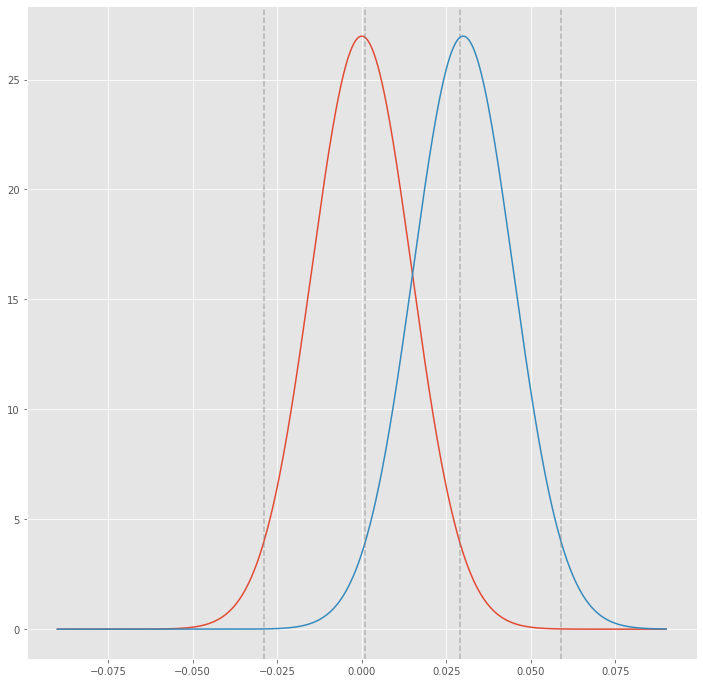

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
x = np.linspace(-0.09, 0.09, 1000)
plot_control(ax, x, stderr)
plot_test(ax, x, stderr, d)